In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [24]:
# import liberaries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [25]:
# loding the dataset 
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [27]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [28]:
df['Class'].value_counts()
# imbalanced dataset 
# class == 0 nomal transaction
# class ==  1 fraud transaction


Class
0    284315
1       492
Name: count, dtype: int64

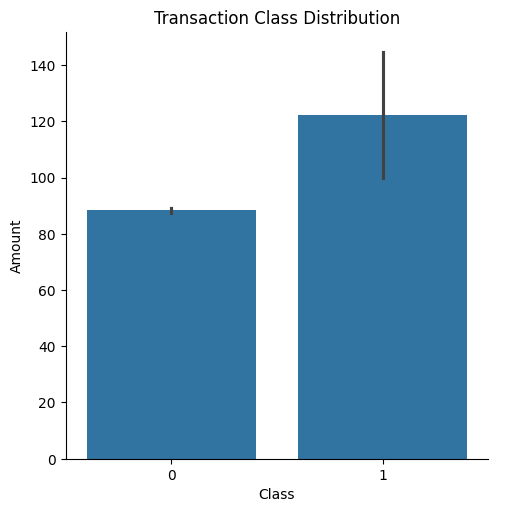

In [29]:
sns.catplot(x='Class',y='Amount',data=df,kind='bar')
plt.title("Transaction Class Distribution")
plt.show()

In [30]:
fraud =  df[df['Class']==1]
legit =  df[df['Class']==0]

In [31]:
df['Time'].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
172760.0     1
172758.0     1
172757.0     1
172756.0     1
172754.0     1
Name: count, Length: 124592, dtype: int64

In [32]:
print(fraud.shape)
print(legit.shape)

(492, 31)
(284315, 31)


In [33]:
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [34]:
# scaling of the numerical columns of non pca value 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Amount','Time']] = scaler.fit_transform(df[['Amount','Time']] )

In [35]:
X = df.drop(columns = ['Class'])
y = df['Class']

In [36]:
# train test spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y, random_state=42)
# stratisy usning to maintin equcal distribution in the test and train dataset

In [37]:
# since the dataset is imbalanced well use hyper parameter tuning
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)


LogisticRegression(class_weight='balanced')

In [46]:
y_pred =  model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,precision_score
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.976911700554332
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     93825
           1       0.06      0.89      0.12       162

    accuracy                           0.98     93987
   macro avg       0.53      0.93      0.55     93987
weighted avg       1.00      0.98      0.99     93987

[[91673  2152]
 [   18   144]]
0.8888888888888888
0.0627177700348432


In [42]:
# manualy tuning for finding the perfet weights 

results = []

for w in [1,5,10,20,50,100]:
    model_1 = LogisticRegression(
        class_weight = {0:1,1:w},
        solver='liblinear',
        max_iter =  500
    )
    model_1.fit(X_train,y_train)
    y_pred_1 = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results.append((w,precision,recall))

In [43]:
print(results)

[(1, 0.06675938803894298, 0.8888888888888888), (5, 0.06675938803894298, 0.8888888888888888), (10, 0.06675938803894298, 0.8888888888888888), (20, 0.06675938803894298, 0.8888888888888888), (50, 0.06675938803894298, 0.8888888888888888), (100, 0.06675938803894298, 0.8888888888888888)]


In [41]:
# by using smote 
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

model.fit(X_train_sm,y_train_sm)
y_prdt_smote = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_prdt_smote))
print(classification_report(y_test, y_prdt_smote))
print(confusion_matrix(y_test, y_prdt_smote))

0.976911700554332
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     93825
           1       0.06      0.89      0.12       162

    accuracy                           0.98     93987
   macro avg       0.53      0.93      0.55     93987
weighted avg       1.00      0.98      0.99     93987

[[91673  2152]
 [   18   144]]
